In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
!unzip '/content/drive/My Drive/Dataset.zip'

Archive:  /content/drive/My Drive/Dataset.zip
replace Dataset/negative-words.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Hyper Parameters and initializations

In [6]:
epochs = 2000
lr = 0.01
W = np.random.randn(7)*np.sqrt(2/7) # HE initialization
b = np.zeros(1)
W = W.reshape(7,1)
d_W = np.zeros_like((W))
d_b = 0
W

array([[-0.7499338 ],
       [-0.79502122],
       [-0.09403421],
       [ 0.24603308],
       [-0.74289006],
       [ 0.1710541 ],
       [ 0.63651401]])

In [0]:


def accuracy(y_pred, y_true):
    return np.sum(y_pred == y_true)

           

# To be used for mini-batch gradient descent

In [0]:
def data_generator(batch_type,batch_size = 32):

        while True:
          start = 0
          stop = batch_size
          if batch_type == 'train':
            total_batches = train_data_matrix.shape[0] // batch_size
          elif batch_type == 'val':
            total_batches = len(val_files) // batch_size

          elif batch_type == 'test':
            total_batches = len(test_files) // batch_size


          
          for i in range(total_batches):
            if i == total_batches-1:
              if batch_type == 'train':
                yield (train_data_matrix[start:,:],labels_train[start:,:])
              elif batch_type == 'val':
                yield (val_data_matrix[start:],labels_validation[start:])
              elif batch_type == 'test':
                yield (test_data_matrix[start:],labels_test[start:])
            
            else:
              if batch_type == 'train':
                yield (train_data_matrix[start:stop,:],labels_train[start:stop,:])
              elif batch_type == 'val':
                yield (val_data_matrix[start:stop,:],labels_validation[start:stop])
              elif batch_type == 'test':
                yield (test_data_matrix[start:stop,:],labels_test[start:stop])
              start = stop
              stop+= batch_size

          


# Loading the dataset

In [0]:
review_dir = '/content/Dataset/'


In [0]:
train_dir = review_dir + 'train/'
test_dir = review_dir + 'test/'


In [0]:
train_pos_files = (os.listdir(train_dir+'pos/'))

train_neg_files = (os.listdir(train_dir+'neg/'))

test_pos_files = (os.listdir(test_dir+'pos/'))
test_neg_files = (os.listdir(test_dir+'neg/'))

train_pos_files_n = train_pos_files.copy()
train_neg_files_n = train_neg_files.copy()
test_pos_files_n = test_pos_files.copy()
test_neg_files_n = test_neg_files.copy()


# Opening the files

In [0]:
for i in range(len(train_pos_files)):
    tr_p_f = open(train_dir+'pos/' +train_pos_files[i], 'r',errors='ignore').read().rstrip("\n").replace('<br />', '').replace('\'','')
    tr_n_f = open(train_dir+'neg/' +train_neg_files[i], 'r',errors='ignore').read().rstrip("\n").replace('<br />', '').replace('\'','')
    te_p_f = open(test_dir+'pos/' +test_pos_files[i], 'r',errors='ignore').read().rstrip("\n").replace('<br />', '').replace('\'','')
    te_n_f = open(test_dir+'neg/' +test_neg_files[i], 'r',errors='ignore').read().rstrip("\n").replace('<br />', '').replace('\'','')
    train_pos_files[i] = tr_p_f
    train_neg_files[i]  = tr_n_f
    test_pos_files[i] = te_p_f
    test_neg_files[i] = te_n_f

# Concatenate postive and negatives into one file

In [0]:

train_pos_files = np.asarray(train_pos_files).reshape(12500,)
train_neg_files  = np.asarray(train_neg_files).reshape(12500,)
test_pos_files = np.asarray(test_pos_files).reshape(12500,)
test_neg_files = np.asarray(test_neg_files).reshape(12500,)
train_pos_files_n = np.asarray(train_pos_files_n).reshape(12500,)
train_neg_files_n  = np.asarray(train_neg_files_n).reshape(12500,)
test_pos_files_n = np.asarray(test_pos_files_n).reshape(12500,)
test_neg_files_n = np.asarray(test_neg_files_n).reshape(12500,)



In [14]:
train_pos_files[0]

'Playwright Sidney Bruhl (a wonderfully over-the-top Michael Caine) would kill for a hit play. Enter young wonder kid (a solid Reeve) whos just written such a play. Weave into this Bruhls overly hysterical wife (superbly played by Cannon) and a German psychic (a very funny Irene Worth) and youve got yourself a wonderfully funny suspense flick.While not up to "Sleuth" standards, "Deathtrap" is none the less a very capable, twist filled comical suspense ride based on a terrific play by Ira Levin. The performers are obviously having a field day with the material, with Caine in particular delivering top notch lines with gusto.The film loses a bit of steam midway through and the ending is a lot less satisfying than the hilarious one in the original play but overall "Deathtrap" is solid, well acted and suspenseful fun.'

In [0]:
train_files = np.hstack((train_pos_files,train_neg_files)).reshape(25000,1)
test_files  = np.hstack((test_pos_files,test_neg_files)).reshape(25000,1)
train_files_n =  np.hstack((train_pos_files_n,train_neg_files_n)).reshape(25000,1)
test_files_n  = np.hstack((test_pos_files_n,test_neg_files_n)).reshape(25000,1)

# More file loading

In [0]:
neg_words = []
with open(review_dir+'negative-words.txt',encoding="ISO-8859-1") as file:
    for word in file:
        neg_words.append(word.strip())
neg_words = np.asarray(neg_words)    

pos_words = []

with open(review_dir+'positive-words.txt',encoding="ISO-8859-1") as file:
    for word in file:
        pos_words.append(word.strip())
pos_words = np.asarray(pos_words)


In [0]:
p = np.array([1]).reshape(1,1)
n = np.array([0]).reshape(1,1)


labels_pos_train = []
labels_pos_test = []

labels_neg_train = np.tile(n, (train_neg_files.shape[0],1))
labels_neg_test =  np.tile(n, (train_neg_files.shape[0],1))
labels_pos_train = np.tile(p, (train_neg_files.shape[0],1))
labels_pos_test = np.tile(p, (train_neg_files.shape[0],1))

labels_train = np.vstack([labels_pos_train,labels_neg_train])
labels_test = np.vstack([labels_pos_test,labels_neg_test])


# Shuffling data

In [0]:

randomize = np.arange(labels_train.shape[0])
np.random.shuffle(randomize)

train_files = train_files[randomize]
test_files = test_files[randomize]
train_files_n = train_files_n[randomize]
test_files_n = test_files_n[randomize]

labels_train = labels_train[randomize]
labels_test = labels_test[randomize]



# Initializing and extracting features for the data matrices

In [0]:
train_data_matrix = np.empty((1,7))
test_data_matrix = np.empty((1,7))




In [0]:
for i in range(train_files.shape[0]):

      count = 0
      words = str(train_files[i]).split()

      for j in range(len(pos_words)):
          if pos_words[j] in words:
              count+=1
      x1 =  count
  
      count = 0
      
      for k in range(len(neg_words)):
          if neg_words[k] in words:
              count+=1
      x2 = count

      rating =int(str(train_files_n[i]).split('.')[0].split('_')[1])
      x3 = rating
      count = 0
      count = np.log2(len(words))
      x4 = count
  
      if ' no ' in words:
          found = 1
      else:
          found = 0
      x5 = found 

      
      if '!' in words:
          found = 1
      else:
          found = 0
      x6 = found 

      instance = np.asarray([1, x1,x2,x3,x4,x5,x6]).reshape(1,7)
      train_data_matrix = np.append(train_data_matrix,instance,axis=0)
            

'\nfor i in range(train_files.shape[0]):\n    x1 = count_pos(train_files[i])\n    x2 = count_neg(train_files[i])\n    x3 = get_rating(train_files_n[i])\n    x4 = log_count(train_files[i])\n    x5 = if_no(train_files[i])\n    x6 = if_exc(train_files[i])\n    instance = np.asarray([1, x1,x2,x3,x4,x5,x6]).reshape(1,7)\n\n    train_data_matrix = np.append(train_data_matrix,instance,axis=0)\n    \n'

In [21]:
train_data_matrix.shape

(25001, 7)

In [0]:
for i in range(test_files.shape[0]):

      count = 0
      words = str(test_files[i]).split()

      for j in range(len(pos_words)):
          if pos_words[j] in words:
              count+=1
      x1 =  count
  
      count = 0
      
      for k in range(len(neg_words)):
          if neg_words[k] in words:
              count+=1
      x2 = count

      rating =int(str(test_files_n[i]).split('.')[0].split('_')[1])
      x3 = rating
      count = 0
      count = np.log2(len(words))
      x4 = count
  
      if ' no ' in words:
          found = 1
      else:
          found = 0
      x5 = found 

      
      if '!' in words:
          found = 1
      else:
          found = 0
      x6 = found 

      instance = np.asarray([1, x1,x2,x3,x4,x5,x6]).reshape(1,7)
      test_data_matrix = np.append(test_data_matrix,instance,axis=0)
            

In [23]:
test_data_matrix[0]

array([-0.7499338 , -0.79502122, -0.09403421,  0.24603308, -0.74289006,
        0.1710541 ,  0.63651401])

# Getting rid of the first random value

In [0]:
test_data_matrix = test_data_matrix[1:,:]
train_data_matrix = train_data_matrix[1:,:] 


In [25]:
test_data_matrix[2500]
labels_test[2500]

array([1])

In [0]:
#training_gen = data_generator("train",32)
#testing_gen = data_generator("test",32)

In [0]:


J=[]

# Training using Batch Gradient Descent

In [0]:

for epch in range(epochs):
  
  logits = np.dot(train_data_matrix,W)
  sig_acts =  1/(1+(np.exp(-logits)))
  #sig_acts.shape
  loss = -np.sum(labels_train*(np.log2(sig_acts+1e-50)) + (1-labels_train)*(np.log2(((1-sig_acts)+1e-50))))
  loss = loss / sig_acts.shape[0]

  J.append(loss)
  # Now start computing the gradient
  d_W = np.zeros_like(W)

  d_W = np.dot((sig_acts - labels_train).T,(train_data_matrix)).T


  d_b = np.sum(sig_acts - labels_train)
  d_b = d_b / labels_train.shape[0]
  d_W = d_W / train_data_matrix.shape[0]
  b = b - lr*d_b
  W = W - lr*d_W
  #print(np.min(sig_acts),np.max(sig_acts))

# Now we test our model on the test data and report our results

In [78]:
# Loss
J

[array([[10.91676122]]),
 array([[7.10025661]]),
 array([[0.0130022]]),
 array([[0.02712852]]),
 array([[0.00136038]]),
 array([[15.38986282]]),
 array([[0.0731987]]),
 array([[6.76754132]]),
 array([[0.04252836]]),
 array([[3.65149027]]),
 array([[0.2089015]]),
 array([[0.27058653]]),
 array([[2.4022096]]),
 array([[0.40080705]]),
 array([[0.02619756]]),
 array([[0.02038946]]),
 array([[1.40253422]]),
 array([[1.83014293]]),
 array([[0.00817005]]),
 array([[0.04771723]]),
 array([[0.52345417]]),
 array([[0.35100665]]),
 array([[0.00646298]]),
 array([[0.05409998]]),
 array([[0.31639048]]),
 array([[0.4243385]]),
 array([[0.25645109]]),
 array([[0.01752749]]),
 array([[0.02245146]]),
 array([[0.02582183]]),
 array([[0.72332369]]),
 array([[0.77542395]]),
 array([[2.23043697]]),
 array([[0.31297009]]),
 array([[0.39824176]]),
 array([[0.07815566]]),
 array([[0.05100701]]),
 array([[0.00556028]]),
 array([[0.21089333]]),
 array([[0.04226619]]),
 array([[1.40882546]]),
 array([[0.03690163

In [79]:
# Learnt weights
W

array([[-1.18736791],
       [ 0.28086835],
       [ 0.0828928 ],
       [ 3.08855425],
       [-2.38812045],
       [ 0.1710541 ],
       [ 0.6342401 ]])

In [0]:
logits = np.dot(test_data_matrix,W)
sig_acts =  1/(1+(np.exp(-logits)))
preds = np.zeros_like((sig_acts)).reshape(test_files.shape[0],1)
mask = sig_acts > 0.5
preds[mask] = 1


In [82]:
# Calculating accuracy

acc = accuracy(preds,labels_test)
acc = acc / labels_test.shape[0]

print("The accuracy on the test data is: ", acc)

The accuracy on the test data is:  0.9998


# Now using SGD

In [88]:

W = np.random.randn((7)).reshape(7,1)

W

array([[-0.21557251],
       [ 0.39691112],
       [-0.10484902],
       [ 0.37536773],
       [ 0.01741159],
       [-0.49868401],
       [-0.51779689]])

In [0]:

for epch in range(24999):
  
  logits = np.dot(train_data_matrix[epch].reshape(1,7),W)
  
  sig_acts =  1/(1+(np.exp(-logits)))
  #sig_acts.shape
  loss = -(labels_train[epch].reshape(1,1)*(np.log2(sig_acts+1e-50)) + (1-labels_train[epch])*(np.log2(((1-sig_acts)+1e-50))))
  
  J.append(loss)
  # Now start computing the gradient
  d_W = np.zeros_like(W)

  d_W = np.dot((sig_acts - labels_train[epch]).reshape(1,1),(train_data_matrix[epch].reshape(1,7))).T
  d_b = (sig_acts - labels_train)

  b = b - lr*d_b
  W = W - lr*d_W
  

In [28]:
W

array([[-1.17446624],
       [ 0.26902658],
       [ 0.06037401],
       [ 3.03003928],
       [-2.3617397 ],
       [ 0.1710541 ],
       [ 0.63424858]])

In [0]:
logits = np.dot(test_data_matrix,W)
sig_acts =  1/(1+(np.exp(-logits)))
preds = np.zeros_like((sig_acts)).reshape(test_files.shape[0],1)
mask = sig_acts > 0.5
preds[mask] = 1

In [31]:
# Calculating accuracy

acc = accuracy(preds,labels_test)
acc = acc / labels_test.shape[0]

print("The accuracy on the test data is: ", acc)

The accuracy on the test data is:  0.99984


# Confusion matrix

In [43]:
t_p,t_n,f_p,f_n = 0,0,0,0
mask = np.zeros_like((preds))


(25000, 1)

In [54]:
mask = preds[preds == labels_test] 
t_p = np.sum(mask)
t_n = len(mask) - t_p
mask = preds[preds != labels_test] 
f_p = np.sum(mask)
f_n = len(mask) - f_p
print(t_p,t_n,f_p,f_n)

12500.0 12496.0 4.0 0.0


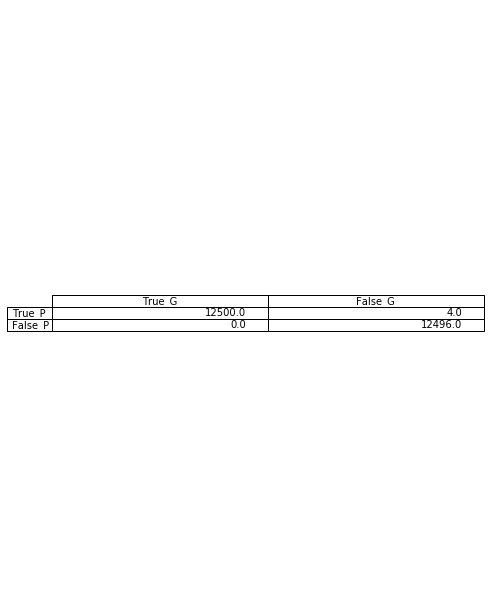

In [71]:
left, width = 0.1, 0.1
bottom, height = 0.1, 0.1
left_table = 0
table_width = 1
table_height = 1

#rect_main = [left, bottom, width, height]
rect_table1 = [left_table, table_height+bottom , table_width, table_height]
rect_table2 = [left_table, bottom, table_width, table_height]

#axMain = plt.axes(rect_main)
axTable1 = plt.axes(rect_table1, frameon =False)
axTable2 = plt.axes(rect_table2, frameon =False)
axTable1.axes.get_xaxis().set_visible(False)
axTable2.axes.get_xaxis().set_visible(False)
axTable1.axes.get_yaxis().set_visible(False)
axTable2.axes.get_yaxis().set_visible(False)

axMain.plot([1,2,3])
axTable1.table(cellText=[[t_p,f_p],[f_n,t_n]],
               rowLabels=['True_P','False_P'], colLabels=['True_G','False_G'])

In [73]:
precision = (t_p)/(t_p + f_p)
recall = t_p / (t_p + f_n)
f1_score = (2*recall*precision)/(recall + precision)

print("Precision is: ", precision,
      "\nRecall is:, ", recall,
      "\nAccuracy is: ", acc,
      "\nF1-Score is: ", f1_score)

Precision is:  0.9996801023672425 
Recall is:,  1.0 
Accuracy is:  0.99984 
F1-Score is:  0.9998400255959047
